<a href="https://colab.research.google.com/github/rollways/JD_EDA/blob/main/LTV_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format',lambda x:'%.2f'%x)

In [177]:
customer_value = pd.read_csv('/content/drive/MyDrive/T大使/customer_segmentation_result.csv',index_col=False)
customer_value.head()

,Unnamed: 0,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,0,9100002488768.00,123,3,23,2,268088.00,2,7,High-Value
1,1,9100002508831.00,16,3,25,2,276824.00,2,7,High-Value
2,2,9100001761848.00,61,3,20,2,197248.00,2,7,High-Value
3,3,9100002184202.00,18,3,20,2,235864.00,2,7,High-Value
4,4,9100001249339.00,68,3,24,2,255800.00,2,7,High-Value


In [178]:
customer_value = customer_value.drop('Unnamed: 0',axis=1)
customer_value

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,9100002488768.00,123,3,23,2,268088.00,2,7,High-Value
1,9100002508831.00,16,3,25,2,276824.00,2,7,High-Value
2,9100001761848.00,61,3,20,2,197248.00,2,7,High-Value
3,9100002184202.00,18,3,20,2,235864.00,2,7,High-Value
4,9100001249339.00,68,3,24,2,255800.00,2,7,High-Value
...,...,...,...,...,...,...,...,...,...
71200,9100002763261.00,329,1,1,0,5272.00,0,1,Low-Value
71201,9100001558486.00,113,3,38,3,45080.00,0,6,High-Value
71202,9100001384559.00,39,3,33,3,38816.00,0,6,High-Value
71203,9100001270685.00,33,3,31,3,67568.00,0,6,High-Value


### Label encoding / (one hot encoding)

In [179]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
customer_value['Segment'] = labelencoder.fit_transform(customer_value['Segment'])
customer_value.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,9100002488768.00,123,3,23,2,268088.00,2,7,0
1,9100002508831.00,16,3,25,2,276824.00,2,7,0
2,9100001761848.00,61,3,20,2,197248.00,2,7,0
3,9100002184202.00,18,3,20,2,235864.00,2,7,0
4,9100001249339.00,68,3,24,2,255800.00,2,7,0


### Calculate and show correlations

In [180]:
corr_matrix = customer_value.corr()
corr_matrix

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
CustomerID,1.00,0.13,-0.13,-0.29,-0.28,-0.30,-0.29,-0.27,0.16
Recency,0.13,1.00,-0.97,-0.47,-0.47,-0.44,-0.45,-0.77,0.15
RecencyCluster,-0.13,-0.97,1.00,0.47,0.47,0.43,0.44,0.78,-0.15
Frequency,-0.29,-0.47,0.47,1.00,0.97,0.93,0.91,0.89,-0.59
FrequencyCluster,-0.28,-0.47,0.47,0.97,1.00,0.90,0.90,0.90,-0.60
Revenue,-0.30,-0.44,0.43,0.93,0.90,1.00,0.95,0.87,-0.57
RevenueCluster,-0.29,-0.45,0.44,0.91,0.90,0.95,1.00,0.89,-0.59
OverallScore,-0.27,-0.77,0.78,0.89,0.90,0.87,0.89,1.00,-0.50
Segment,0.16,0.15,-0.15,-0.59,-0.60,-0.57,-0.59,-0.50,1.00


In [181]:
corr_matrix['Segment'].sort_values(ascending=False)
print(corr_matrix['Segment'].sort_values(ascending=False))

Segment             1.00
CustomerID          0.16
Recency             0.15
RecencyCluster     -0.15
OverallScore       -0.50
Revenue            -0.57
Frequency          -0.59
RevenueCluster     -0.59
FrequencyCluster   -0.60
Name: Segment, dtype: float64


### Standaration

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(customer_value[['Recency','RecencyCluster','Frequency','FrequencyCluster','Revenue','RevenueCluster']])
y = customer_value['Segment']
##資料存進x,y是結果,透過x去預測y

In [183]:
x,y

(array([[-0.73342026,  1.09111497,  1.44730373,  1.37262027,  1.48475403,
          1.58819565],
        [-1.23016427,  1.09111497,  1.64879703,  1.37262027,  1.55725989,
          1.58819565],
        [-1.02125323,  1.09111497,  1.14506377,  1.37262027,  0.89680581,
          1.58819565],
        ...,
        [-1.12338752,  1.09111497,  2.45477025,  2.4108559 , -0.41812661,
         -0.6844397 ],
        [-1.15124232,  1.09111497,  2.25327694,  2.4108559 , -0.17949467,
         -0.6844397 ],
        [ 1.434612  , -1.59811816,  2.45477025,  2.4108559 , -0.45384837,
         -0.6844397 ]]), 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 71200    1
 71201    0
 71202    0
 71203    0
 71204    2
 Name: Segment, Length: 71205, dtype: int64)

### Split Test andd Train

In [184]:
from sklearn.model_selection import train_test_split
#split training and test sets
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=56)

In [185]:
X_train,y_train

(array([[-0.30631326,  0.19470393, -0.16464271,  0.33438463,  0.36018271,
          0.45187798],
        [-0.82162714,  1.09111497, -0.76912262, -0.703851  , -0.69653055,
         -0.6844397 ],
        [-1.22087933,  1.09111497, -0.66837597, -0.703851  , -0.64626779,
         -0.6844397 ],
        ...,
        [-0.71485039,  1.09111497,  2.85775686,  2.4108559 ,  3.59884453,
          2.72451332],
        [-0.50593936,  0.19470393,  1.34655707,  1.37262027,  0.91479948,
          1.58819565],
        [-0.72413532,  1.09111497, -0.66837597, -0.703851  , -0.66618698,
         -0.6844397 ]]), 19289    2
 33942    2
 31778    2
 64818    1
 47781    1
         ..
 65769    1
 42106    1
 25835    0
 3264     0
 33167    2
 Name: Segment, Length: 35602, dtype: int64)

### Support Vector Machine (SVM)

In [186]:
import sklearn
#參數
#1. 核函數 kernel - 在模型裡面,代表我們可以選擇各式各樣的核函數,包含線性,多項式,高斯,sigmoid等等

#2. 參數C - C為懲罰係數。 C愈大代表錯誤的容忍程度愈低，在訓練集樣本中會區分的愈精細，因此設定太大容易造成過度擬和的問題。
  #反之，設定太小則會造成低度擬合的問題。若沒設定，模型中預設為1。

#3. 參數gamma - gamma參數決定支援向量的多寡，並影響訓練速度與預測速度 。
  #此參數有兩個自動運算選擇，分別為’scale’與’auto’，或是也可以直接指定數值，設定後會以下列方式算出隱含參數，
  #以決定資料映射到新特徵空間後的分佈，在未設定下預設為’scale’。

from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score

clf = svm.SVC(kernel='rbf',C=1,gamma='auto')
clf.fit(X_train,y_train)

clf.predict(X_train)

clf.predict(X_test)

array([1, 1, 2, ..., 1, 2, 0])

In [187]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

#交叉驗證
scores = cross_val_score(clf,X_train,y_train,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

1.0
1.0
[1. 1. 1. 1. 1.]
1.0


### logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)


print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))
#交叉驗證


1.0
1.0


### Naive Bayes

In [189]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8868883770574687
0.8860208409403701


### K-Nearest Neighbors

In [190]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.999943823380709
0.9998595623964273


### Decision Tree

In [191]:
from sklearn.tree import DecisionTreeClassifier

#criterion使用entropy來計算訊息增益
#max_depth是指樹狀圖的最大深度
model = DecisionTreeClassifier(max_depth=2,criterion='entropy')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8844727824279535
0.8881835800353903


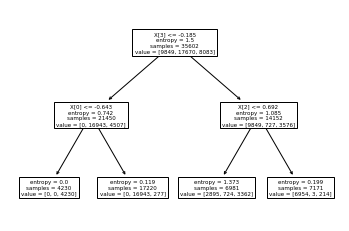

In [192]:
from sklearn.tree import export_graphviz
from sklearn import tree
#viz code
tree.plot_tree(model);

### xgboost

In [193]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)

print(xgbc.score(X_train,y_train))
print(xgbc.score(X_test,y_test))

0.999887646761418
0.9996348622307109
